Do PCA on VGG16 Output to see if similar watches are clustered together

In [30]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Open Relevant Files

In [ ]:
f_vecs = np.load('vgg16_raw_feature_vectors.npy')
watch_names = pd.read_csv('vgg16_raw_feature_vectors_names.csv',index_col=0)

In [4]:
#watch_names = watch_names.iloc[:-1,:] #Excluded last model when running before

In [5]:
np.shape(f_vecs)

(10456, 4096)

Compute Cosine Similarities

In [6]:
dists = cosine_similarity(f_vecs) 

In [7]:
np.shape(dists)

(10456, 10456)

In [8]:
dist_df = pd.DataFrame(data = dists)

In [9]:
dist_df.index = watch_names['file_name'].iloc[:-1]
dist_df.columns = watch_names['file_name'].iloc[:-1]

Function for finding n closest matches

In [13]:
def get_similar(watchs, n=None):
    """
    calculates which watchs are most similar to the watchs provided. Does not return
    the watchs that were provided
    
    Parameters
    ----------
    watchs: list
        some watchs!
    
    Returns
    -------
    ranked_watchs: list
        rank ordered watchs
    """
    watchs = [watch for watch in watchs if watch in dist_df.columns]
    watchs_summed = dist_df[watchs].apply(lambda row: np.sum(row), axis=1)
    watchs_summed = watchs_summed.sort_values(ascending=False)
    ranked_watchs = watchs_summed.index[watchs_summed.index.isin(watchs)==False]
    ranked_watchs = ranked_watchs.tolist()
    if n is None:
        return ranked_watchs
    else:
        return ranked_watchs[:n]

Random Image

(-0.5, 399.5, 399.5, -0.5)

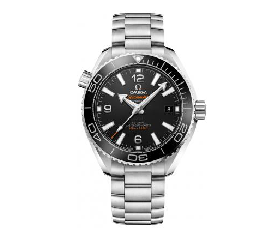

In [114]:
f_path = 'f_vec_data_padded/train/'
starting_name = np.random.choice(dist_df.index)
img=mpimg.imread(f_path + starting_name )
imgplot = plt.imshow(img)
plt.axis('off')

Recommendations

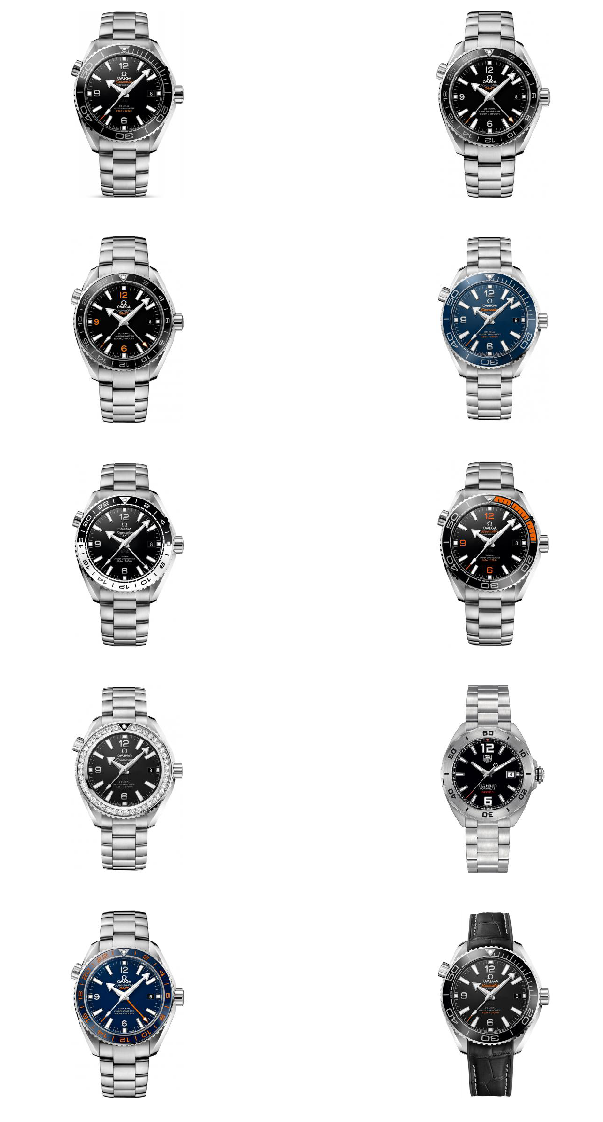

In [115]:
n = 10
recommend_names = get_similar([starting_name],n=n)

r = int(np.ceil(n/2))
c = 2
plt.subplots(nrows=r, ncols=c,figsize=(12,20))

for ix, f_name in enumerate(recommend_names):
    plt.subplot(r,c,ix+1)
    img=mpimg.imread(f_path + f_name)
    imgplot = plt.imshow(img)
    plt.axis('off')